<a href="https://colab.research.google.com/github/shril108/Nike-vs-Adidas-Classifier/blob/main/SneakerAid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2                 # working with, mainly resizing, images
import numpy as np         # dealing with arrays
import os                  # dealing with directories
import random                # mixing up or currently ordered data that might lead our network astray in training.
import matplotlib.pyplot as plt
import tensorflow as tf
import albumentations as A
from PIL import Image
from functools import partial
import re
import urllib


ADIDAS = "/content/drive/MyDrive/Shoe Pics/shoepics/adidas"
NIKE = "/content/drive/MyDrive/Shoe Pics/shoepics/nike"
TRAIN = "/content/drive/MyDrive/Shoe Pics/shoepics/train"
TEST = "/content/drive/MyDrive/Shoe Pics/shoepics/test"


LR = 1e-3
AUTOTUNE = tf.data.experimental.AUTOTUNE
IMG_SIZE = 150
BATCH_SIZE = 32

In [ ]:
def visualize(image):
    plt.figure(figsize=(10, 10))
    plt.axis('off')
    plt.imshow(image)

In [ ]:
#defining data augmentation pipeline

#augmentations that make sense for immage classifier:
#flipping, color space, rotation

transform = A.Compose([
    A.HorizontalFlip(p = 0.5),
    A.RandomBrightnessContrast(p = 0.5),
    A.RandomRotate90(p = 0.5),
    A.Blur(blur_limit = 3, p = 0.9),
    A.RGBShift(r_shift_limit=20, g_shift_limit=20, b_shift_limit=20, p=0.9)
])

In [ ]:
#displaying images, the parameter has to be in a list format
def plot_examples(images):
    fig = plt.figure(figsize=(15, 15))
    columns = 4
    rows = 5

    for i in range(1, len(images)):
        img = images[i-1]
        fig.add_subplot(rows, columns, i)
        plt.imshow(img)
    plt.show()

In [ ]:
#actually putting the images from adidas and nike through the DA pipeline
#need to pass in adidas and nike labels into the shoes list so that you can distribute to train and test folders accordingly

shoes = []
#the data paths variables are made to ensure that there are no directories included in the files we want to augment
data_paths1 = [os.path.join(ADIDAS, f) for f in os.listdir(ADIDAS)]
data_paths1 = [i for i in data_paths1 if os.path.isfile(i)]
data_paths2 = [os.path.join(NIKE, f) for f in os.listdir(NIKE)]
data_paths2 = [i for i in data_paths2 if os.path.isfile(i)]


for image in data_paths1:
  # print(f"{image}")
  label = image[49:55]
  image = Image.open(image)
  image = np.array(image)
  # print(f"{image.shape}")
  augDict = transform(image = image)
  augImg = augDict["image"]
  shoes.append([augImg, label])


for image in data_paths2:
  # print(f"{image} {counter}")
  label = image[47:51]
  image = Image.open(image)
  image = np.array(image)
  # print(f"{image.shape}")
  augDict = transform(image = image)
  augImg = augDict["image"]
  shoes.append([augImg, label])




In [ ]:
#testing to see if shoes list was made properly

print(shoes[0][1])
print(shoes[120][1])
print(len(shoes))


adidas
nike
200


In [ ]:
#need to make sure when you distribute the augmented photos to the training and testing folders that they are not distributed unevenly
random.shuffle(shoes)

In [ ]:
#not needed everytime
#to delete files from train and test folders


trainList = [os.path.join(TRAIN, f) for f in os.listdir(TRAIN)]
trainList = [i for i in trainList if os.path.isfile(i)]
testList= [os.path.join(TEST, f) for f in os.listdir(TEST)]
testList= [i for i in testList if os.path.isfile(i)]


# for pict in trainList:
#   os.remove(pict)

# for pict in testList:
#   os.remove(pict)

# for pict in tempList:
#   os.remove(pict)

In [ ]:
#making the train and test datasets

# putting the shoes list (or the augmented pictures from adidas and nike) into the train and test folders, 80% into train, 20% into test
counter = 0
for shoe, label in shoes[:160]:
  picture = Image.fromarray(shoe)
  # print(label)
  # print('split')
  # print(shoe)
  picture.save(f"/content/drive/MyDrive/Shoe Pics/shoepics/train/{label}_{counter}.png")
  counter += 1

counter = 0
for shoe, label in shoes[160:]:
  picture = Image.fromarray(shoe)
  # print(label)
  # print('split')
  # print(shoe)
  picture.save(f"/content/drive/MyDrive/Shoe Pics/shoepics/test/{label}_{counter}.png")
  counter += 1



In [ ]:
#making the train and test datasets

#take normal pics from adidas and nike folders and also put them in the training and testing datasets
for index, pic in enumerate(data_paths1[:80]):
  imag = Image.open(pic)
  imag.save(f"/content/drive/MyDrive/Shoe Pics/shoepics/train/adidas_{index}.png")

for index, pic in enumerate(data_paths1[80:]):
  imag = Image.open(pic)
  imag.save(f"/content/drive/MyDrive/Shoe Pics/shoepics/test/adidas_{index}.png")


for index, pic in enumerate(data_paths2[:80]):
  imag = Image.open(pic)
  imag.save(f"/content/drive/MyDrive/Shoe Pics/shoepics/train/nike_{index}.png")

for index, pic in enumerate(data_paths2[80:]):
  imag = Image.open(pic)
  imag.save(f"/content/drive/MyDrive/Shoe Pics/shoepics/test/nike_{index}.png")


In [ ]:
#now we have our test and train folders full of images!
print(len(os.listdir("/content/drive/MyDrive/Shoe Pics/shoepics/train")))
print(len(os.listdir("/content/drive/MyDrive/Shoe Pics/shoepics/test")))

240
60


In [ ]:
#hot encoding method

def hotEncode(img):
    word_label = img.split('_')[0]
    if word_label == 'nike': return [1,0] #one hot encoding
    elif word_label == 'adidas': return [0,1] #one hot encoding

In [ ]:
#make sure that the TRAIN and TEST only have img files and none of the .ipynb checkpoints

trainList = [os.path.join(TRAIN, f) for f in os.listdir(TRAIN)]
trainList = [i for i in trainList if os.path.isfile(i)]
testList= [os.path.join(TEST, f) for f in os.listdir(TEST)]
testList= [i for i in testList if os.path.isfile(i)]


trainStuff = []
testStuff = []

#make trainList and testList have just the adidas1.png or nike1.png format
for pic in trainList:
  pic = pic.split('/')[-1]
  trainStuff.append(pic)

for pic in testList:
  pic = pic.split('/')[-1]
  testStuff.append(pic)



print(trainStuff[:2])
print(testStuff[:2])

#verifying nothing was cut out of original lists
print(len(trainList))
print(len(trainStuff))
print(len(testList))
print(len(testStuff))

['adidas_80.png', 'nike_81.png']
['nike_20.png', 'nike_21.png']
240
240
60
60


In [ ]:
#now to process and make the actual datasets for the train and test folders, the actual datasets that we will pass into the fitting method


#what is the ANTIALIAS all about?
#When data that makes up the image has a different resolution than its representation on the screen we will see aliasing effects
def createTrain():
    train_data = []
    for img in trainStuff:
        label = hotEncode(img)
        path = os.path.join(TRAIN, img)
        img = Image.open(path) #Read image syntax with PIL Library
        img = img.convert('L') #Grayscale conversion with PIL library
        img = img.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS) #Resizing image syntax with PIL Library        
        train_data.append([np.array(img), np.array(label)])
    random.shuffle(train_data)
    np.save('/content/drive/MyDrive/Shoe Pics/shoepics/train_data.npy', train_data) #.npy extension = numpy file
    return train_data

def createTest():
    test_data = []
    for img in testStuff:
        num = img.split("_")[1]
        path = os.path.join(TEST, img)
        img = Image.open(path)
        img = img.convert('L')
        img = img.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
        test_data.append([np.array(img), num])
    random.shuffle(test_data)
    np.save('/content/drive/MyDrive/Shoe Pics/shoepics/test_data.npy', test_data)
    return test_data

In [ ]:
trainData = createTrain()
testData = createTest()

[0 1]


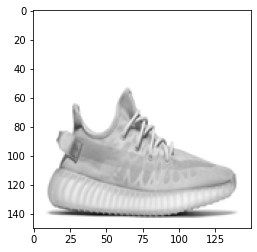

In [ ]:
plt.imshow(trainData[105][0], cmap = 'gist_gray')
print(trainData[105][1])

In [ ]:
!pip install tflearn

     |████████████████████████████████| 107 kB 14.5 MB/s 
  Created wheel for tflearn: filename=tflearn-0.5.0-py3-none-any.whl size=127299 sha256=d0d6f57b3a933768afb0a9bd1544e5a59146233bf7d533b5943c657210112c58
  Stored in directory: /root/.cache/pip/wheels/5f/14/2e/1d8e28cc47a5a931a2fb82438c9e37ef9246cc6a3774520271
Successfully built tflearn


In [ ]:
import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression

from tensorflow.python.framework import ops
ops.reset_default_graph()

convnet = input_data(shape=[None, IMG_SIZE, IMG_SIZE, 1], name = 'input')

convnet = conv_2d(convnet, 32, 5, activation = 'relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 64, 5, activation = 'relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 32, 5, activation = 'relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 64, 5, activation = 'relu')
convnet = max_pool_2d(convnet, 5)


convnet = fully_connected(convnet, 1024, activation = 'relu')
convnet = dropout(convnet, 0.8)
convnet = fully_connected(convnet, 2, activation = 'softmax')
convnet = regression(convnet, optimizer = 'adam', learning_rate = LR, loss = 'categorical_crossentropy', name = 'targets')
model = tflearn.DNN(convnet, tensorboard_verbose=3)

In [ ]:
#making the validation set from the train data, to use to verify the model before putting it on the test data

train = trainData[-90:] #Train Set
test = trainData[:-90] #Validation Set

In [ ]:
#making the X and Y sets for fitting the model
X = np.array([i[0] for i in train]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
Y = [i[1] for i in train]

test_x = np.array([i[0] for i in test]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
test_y = [i[1] for i in test]

In [ ]:
#actually fit the model
model.fit({'input': X}, {'targets': Y}, n_epoch=100, validation_set=({'input': test_x}, {'targets': test_y}), 
          snapshot_step=50, show_metric=True, run_id='SNEAKERAID')

Training Step: 205  | total loss: 0.64147 | time: 2.975s
| Adam | epoch: 103 | loss: 0.64147 - acc: 0.9275 -- iter: 64/90
Training Step: 206  | total loss: 0.57747 | time: 5.222s
| Adam | epoch: 103 | loss: 0.57747 - acc: 0.9348 | val_loss: 0.19790 - val_acc: 0.9200 -- iter: 90/90
--


[0.0265206 0.9734794]
[0.01204857 0.98795146]
[9.9929023e-01 7.0969807e-04]
[0.33206406 0.6679359 ]
[0.00947388 0.9905261 ]
[9.9913150e-01 8.6851214e-04]
[0.99408853 0.00591151]
[0.99894017 0.00105981]
[0.00676232 0.9932376 ]
[0.99770075 0.00229928]


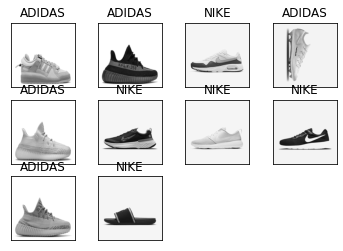

In [ ]:
fig = plt.figure()

for num, data in enumerate(testData[:10]):
    img_num = data[1]
    img_data = data[0]
    
    y = fig.add_subplot(3,4,num+1)
    orig = img_data
    data = img_data.reshape(IMG_SIZE, IMG_SIZE, 1)
    model_out = model.predict([data])[0]
    print(model_out)
    if np.argmax(model_out) == 1:
        str_label = 'ADIDAS'
    else:
        str_label = 'NIKE'
    
    y.imshow(orig, cmap = 'gray')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
plt.show()